Haberman Analysis: Case Study through EDA (Exploratory Data Analysis)

The Haberman's Survival dataset, used in Python for data analysis and machine learning, contains data from a study on breast cancer surgery survival conducted between 1958 and 1970, focusing on patients' age, operation year, axillary node count, and survival status.

What is the Haberman's Survival Dataset?

Origin:
The dataset comes from a study conducted at the University of Chicago's Billings Hospital. 

Purpose:
The study aimed to investigate the survival of patients who underwent surgery for breast cancer. 

Data:
The dataset includes information on:
Age: Patient's age at the time of surgery. 

Year of Operation: The year the surgery was performed. 
Positive Axillary Nodes: The number of positive axillary nodes detected. 
Survival Status: Whether the patient survived the surgery or not. 

Availability:
The dataset is publicly available on the UCI Machine Learning Repository. 

Why is it used in Python?
Data Analysis:
The dataset is commonly used for exploratory data analysis (EDA) to understand the relationships between the variables and identify potential patterns.

Machine Learning:
It can be used to train machine learning models to predict survival status based on the other variables. 

Python Libraries:
Python libraries like Pandas, NumPy, Scikit-learn, and Matplotlib/Seaborn are used to load, analyze, and visualize the data. 


In the CSV file, first column denotes to 'Age' and second one denotes to 'Year' starting from 1964, 1962 ... and so on


We have 3 feature and 1 class label.

1- Age of the pateint at the time of operation.
2- Year- Year in which pateint had an operation in 90's , if 64 is written it mean 1964.
3- Nodes- Number of positive axillary nodes detected. These are known as 'Axillary Lymph Nodes' whose function is to filter fluids before they are eventually released into the bloodstream. Having a cancer cells in nodes tells us that the cancer might have spread to other body parts also.
4- Survival Status- This is target variable having two values 1 and 2. 
1: indicates: the pateint survived 5 years or longer post operation. 
2: indicates: the pateint died with 5 years.

The more number of Axillary Lymph Nodes found in the body , the chances of spread of cancer in the body is higher.

Positive axillary lymph nodes mean that cancer cells have spread from the original tumor to at least one of the lymph nodes in the armpit area (axilla). 

Here's a more detailed explanation:

What are axillary lymph nodes?
Axillary lymph nodes are small, bean-shaped organs located in the armpit, which are part of the lymphatic system. 

What does "positive" mean?
In the context of cancer, "positive" axillary lymph nodes means that cancer cells have been found within those lymph nodes, indicating that the cancer has spread from the original tumor to the lymph nodes. 

Why is it important?
The presence of cancer cells in axillary lymph nodes is a key indicator of the stage and prognosis of breast cancer, and it can influence treatment decisions. 

How is it determined?
Doctors determine if axillary lymph nodes are positive through a combination of physical exams, imaging techniques like ultrasound, and potentially through biopsies or surgical removal of the lymph nodes for examination under a microscope. 

What are the implications?
The presence of cancer in axillary lymph nodes often means that the cancer is more advanced and may require more aggressive treatment, such as chemotherapy or radiation therapy, in addition to surgery. 

What does "negative" mean?
Negative axillary lymph nodes mean that no cancer cells were found in the lymph nodes, indicating that the cancer has not yet spread to the lymph nodes in the armpit. 

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('haberman.csv')

In [58]:
df.columns= ['Age', 'Year', 'Nodes', 'Survival']   #becz we don't have column in haberman csv file, so here it is denoted 

In [59]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


AGENDA: Given a patient with the some age, year of operation and  number of lymph nodes detected , we have too predict or conclude the 
chances whether the pateint will live less than 5 years or more than 5 years.

In [60]:
df.shape  #305: row and 4: column

(305, 4)

In [61]:
#check whether it contains any null value or not
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [62]:
#lets check whether any duplicate value or not #false: no duplicate value, True: Duplicate value present
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
300    False
301    False
302    False
303    False
304    False
Length: 305, dtype: bool

In [63]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

In [64]:
#whether you should remove duplicated value or not ?
# So accoridng to dataset, lets say a person Name "David" or we have possibility that there more 5-6-10 or number of David who are cancer pateint,
# so it could be possible they are having same age or same survival rate , so there is no need to remove duplicate value



In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [66]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [67]:
df = df.replace([1,2],[0, 1])

In [68]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [69]:
#description of dataframe
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [70]:
# MIN(AGE)= 30, MAX(AGE)=83 YEAR = BETWEEN [1958, 1969], RANGE OF NODES= [0,52], Survival=[0,1]

#By df.describe you can say 75% have value 4 and max value have 52 so it is right skewed towards graph
# Nodes have higher count density between 0 and 4(75 percentile)

UNIVARIATE ANALYSIS

Univariate analysis in Python, as applied to the Haberman dataset, involves examining each variable (like age, year, axillary nodes, and survival status) individually to understand its distribution, patterns, and characteristics. This helps in understanding the data's range, spread, and potential outliers before moving on to more complex analyses. 

Here's a breakdown:
What is it?
Univariate analysis focuses on a single variable at a time, exploring its characteristics and distribution. 

How it works:
Descriptive Statistics: Calculate measures like mean, median, mode, standard deviation, and range to summarize the variable's central tendency and spread. 

Data Visualization: Create histograms, box plots, or density plots to visualize the distribution of the variable. 
Python Libraries: Use libraries like pandas, matplotlib, and seaborn to perform these tasks. 

How it helps with the Haberman dataset:

Understanding Variables: Helps understand how each variable (age, year, axillary nodes, survival status) behaves individually. 

Identifying Patterns: Detect potential patterns or trends within each variable, like skewness or outliers. 

Data Exploration: Provides a foundation for further analysis, such as bivariate or multivariate analysis.

Example: Analyzing the distribution of age can reveal if the dataset has a skewed age distribution. 

Lets talk about features:
so the first feature is : SURVIVAL

In [71]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [72]:
df.Survival.value_counts(1)

Survival
0    0.734426
1    0.265574
Name: proportion, dtype: float64

In [73]:
#there are only 27% of people who will be living less than 5 years (showing in 1), which means the dataset is imbalanced but not highly imbalanced
# and 73% of people live more than 5 years(show in 0)

<Axes: xlabel='Survival', ylabel='count'>

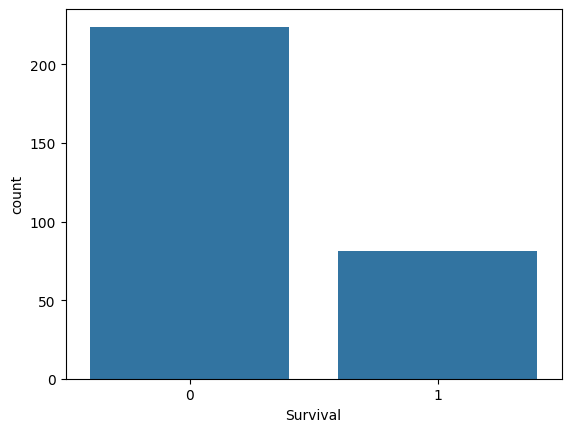

In [74]:
sns.countplot(x= 'Survival', data= df)

Lets Go to Second feature: AGE

In [75]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

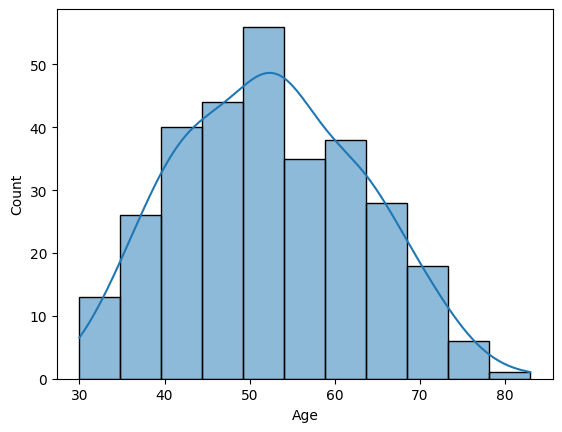

In [76]:
#lets define how skewed is the distribution
print(df.Age.skew())
sns.histplot(x= 'Age', data=df, binwidth=5, kde= True)  # you can take binwidth=10 but, smaller binwidth helps in identify pattern more 

Conclusion: The maximum people who are operated where in the age group of 50 to 55.

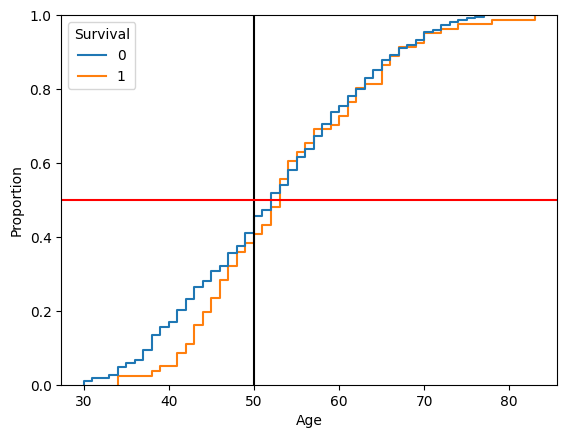

In [77]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(50, c= 'Black')
plt.axhline(0.5, c='red');

0    0.734426   # ~73% of patients survived 5 years or more
1    0.265574   # ~27% of patients did NOT survive 5 years
0 → Survived 5+ years (73%) → Blue Line

1 → Did not survive 5 years (27%) → Orange Line

Even though the classes are imbalanced, the imbalance is moderate, not extreme. Now let's interpret the ECDF plot in this context.

📈 ECDF Plot Explanation (with Imbalance in Mind)
This ECDF (Empirical Cumulative Distribution Function) chart shows how age is distributed across the two survival classes.

🔹 Blue Line: Survival = 0 (Survived 5+ years)
Represents 73% of the dataset.

The line increases gradually, showing the proportion of long-term survivors up to a certain age.

At Age = 50, just over 50% of these patients are younger than 50.

Indicates a more even spread of age among those who survived.

🟠 Orange Line: Survival = 1 (Did NOT survive 5 years)
Represents 27% of the dataset.

The curve is steeper in the earlier ages and flattens out earlier.

At Age = 50, nearly 60%+ of these patients are younger than 50.

This suggests that more younger patients were in the non-surviving group.

💡 Key Takeaways Combining ECDF + Class Imbalance
Younger Non-Survivors:

A larger proportion of non-survivors (orange) are younger than 50.

For example, at age 50:

~60% of non-survivors are below 50.

Only ~50% of survivors are below 50.

This may seem counterintuitive — younger people had a higher risk in this dataset.

Older Survivors:

The blue curve (survivors) rises more slowly, indicating that survivors are more evenly distributed across ages, including older ages.

Dataset Imbalance Reflection:

Despite only 27% being non-survivors, their ECDF rises quickly.

This shows that non-survivors are more concentrated in lower age ranges.

While the dataset is imbalanced (73:27), the ECDF still clearly shows pattern differences.

🧠 Conclusion
Even though there are fewer non-survivors (27%), the ECDF reveals an important pattern:

Non-survivors tend to be younger.

Survivors are spread out more evenly across all ages.

This tells us age alone doesn’t guarantee survival, and in this dataset, younger patients might have had more severe conditions or other factors impacting survival.

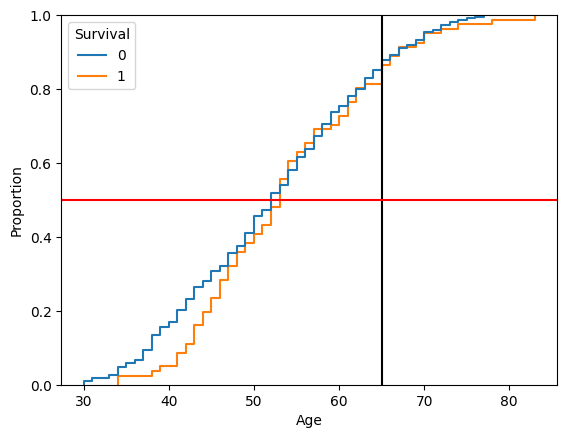

In [78]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(65, c= 'Black')
plt.axhline(0.5, c='red');

In [79]:
# 85% of people were 65 years or below (see the point were intersection has been occur)

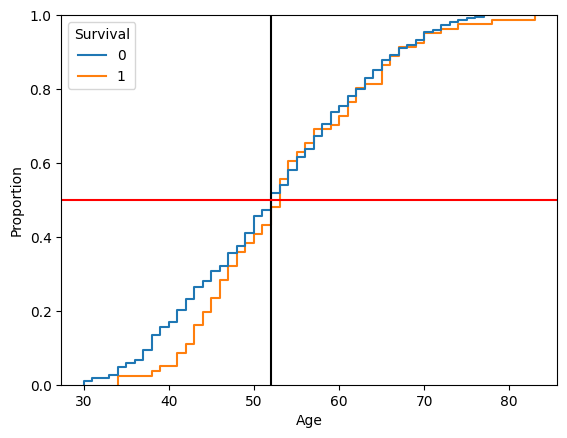

In [80]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(52, c= 'Black')
plt.axhline(0.5, c='red');

In [81]:
# 50% of people were 52 years or below

Third Feature is : Operation Year

At what perticular year or time max people survive

In [82]:
df.Year.value_counts()

Year
58    36
64    30
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

<Axes: xlabel='Year'>

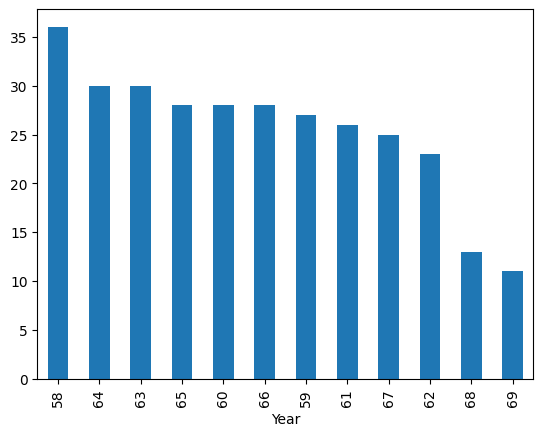

In [83]:
df.Year.value_counts().plot(kind='bar')

People operated during each year are reduces as shown in graph.

It creates a lot of question that either the people are treated good so they dont need operation any more or there is less survival rate thatswhy people are not operated any more.

4rth Features: Lymph Node

In [84]:
df.Nodes.describe()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

In [85]:

df.Nodes.value_counts()

Nodes
0     176
3      20
1      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
15      3
23      3
10      3
19      3
22      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: count, dtype: int64

<Axes: xlabel='Nodes'>

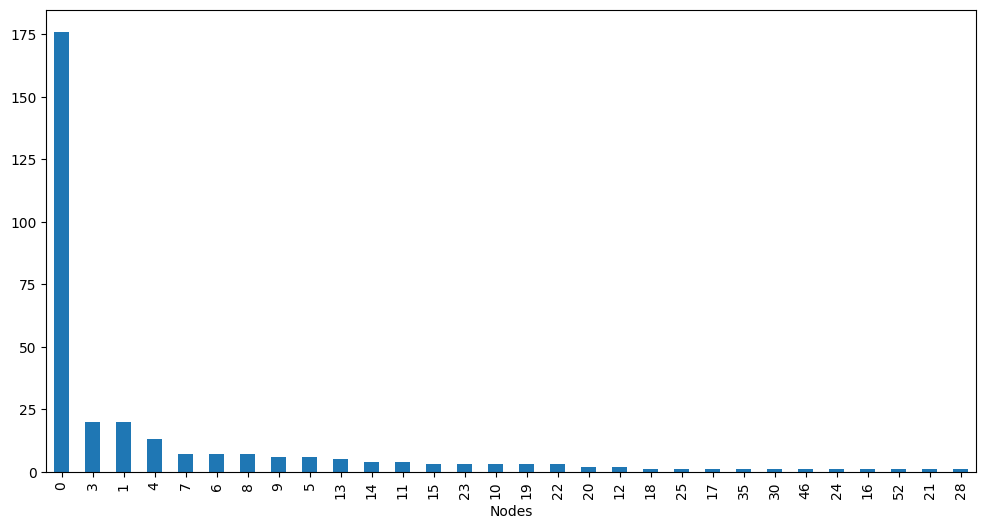

In [86]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar')

In [87]:
#more number of node show, cancer cell has spread into other body parts also, 0 nodes present in 175 people 


2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

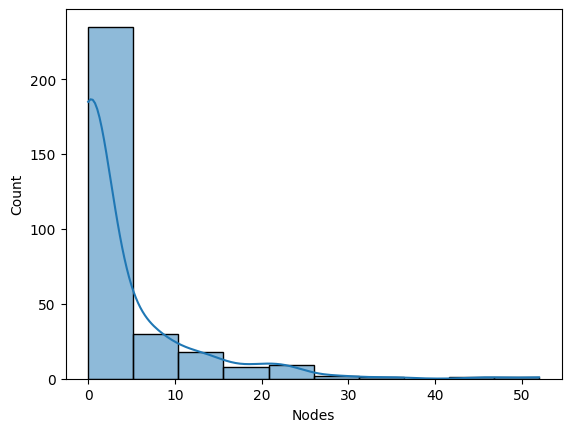

In [88]:
print(df.Nodes.skew())
sns.histplot(x= 'Nodes', data=df, binwidth= 5, kde= True)

The graph is right skewed

max density count for nodes is between 0 and 10.

Bivariate Analysis

In the context of the Haberman's survival dataset analysis using Python, bivariate analysis helps to explore relationships between two variables, such as age and survival status, or number of nodes and survival status, aiding in understanding potential predictors of survival. 

Here's a more detailed explanation:
What is Bivariate Analysis?
Bivariate analysis examines the relationship between two variables simultaneously, aiming to identify any correlations or patterns between them. 

Why is it used in the Haberman dataset?
Feature Selection: Bivariate analysis can help determine which features (variables) are most likely to be predictive of survival status, assisting in feature selection for building predictive models. 

Understanding Relationships: It allows you to visualize and understand the relationship between different patient characteristics (like age, year of operation, number of positive nodes) and survival status. 

Identifying Trends: Bivariate analysis can reveal trends or patterns in the data, such as whether older patients or those with more positive nodes tend to have a shorter survival time. 

Techniques used:
Scatter plots: These are useful for visualizing the relationship between two numerical variables. 

Pair plots: These show all possible pairwise relationships between multiple variables in a dataset. 

Box plots: These can be used to compare the distribution of one variable across different categories of another variable. 

Example:
You could use bivariate analysis to see if there's a correlation between the number of positive axillary nodes and the survival status (whether the patient survived for 5 years or longer). 

In [89]:
#Age-Survival
#Age-Nodes-Survival
#Nodes-Survival
#Year-Survival
#Age-Nodes
#Year-Nodes
#Age-Years

#These are the maximum combination we can check

In [90]:
#Age-Survival

<Axes: xlabel='Survival', ylabel='Age'>

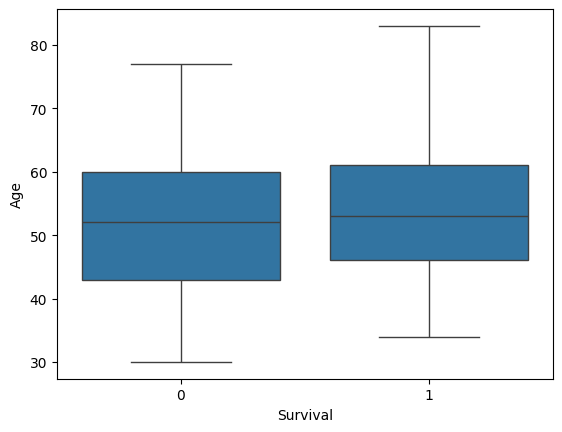

In [91]:
sns.boxplot(x= 'Survival', y= 'Age', data=df)

1. We can see in graph that no outlier is present and people of higher age (greater than 50) tend to die more.(from 0)

2. People of age> 77 will actually live lesser than 5 years. (from 0)

3. people with age< 35 will actually live more than 5 years

Box Plot Explanation;

📊 What This Plot Shows:
This is a box plot comparing the distribution of Age between the two Survival groups:

0 → Survived 5 years or more

1 → Did not survive 5 years

Each box represents:

The box (middle 50%) → Interquartile Range (IQR): from 25th percentile (Q1) to 75th percentile (Q3)

The line inside the box → Median (50th percentile)

"Whiskers" → Data within 1.5 * IQR from Q1 and Q3

Dots (if present) → Outliers (values beyond 1.5 * IQR)

🧠 Interpretation of the Plot
Median Age (Line in the box):

Survivors (0): Median is around 52

Non-survivors (1): Median is slightly higher, around 54

IQR (Spread of Middle 50%):

Both groups have similar spreads (IQR range roughly 45 to 60+)

Age Range:

Survivors range from ~30 to 77

Non-survivors range from ~34 to 82

No Outliers:

There are no dots outside the whiskers, meaning no outliers based on the standard IQR rule.

❓ How to Detect Outliers in a Box Plot
In box plots, outliers are visually represented as individual points or dots beyond the "whiskers".

To detect them mathematically:

Calculate the IQR = Q3 - Q1

Define lower bound = Q1 - 1.5 * IQR

Define upper bound = Q3 + 1.5 * IQR

Any values outside this range are outliers

Example (conceptually):
python
Copy
Edit
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
✅ Summary:
The box plot shows slightly higher median age for non-survivors, but the overall age distribution between the groups is quite similar.

There are no visible outliers in this plot.

Box plots are great for quick visual comparisons, and this supports the earlier ECDF findings — age difference between survival groups is not very significant.


In [92]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]


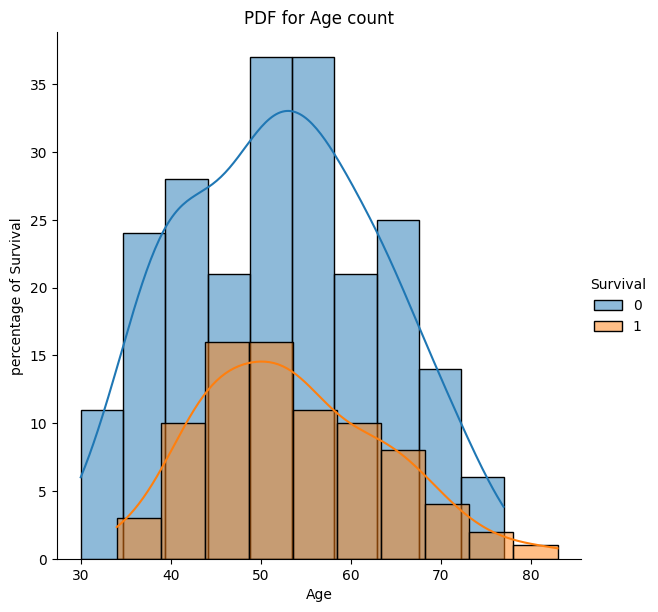

In [93]:
sns.FacetGrid(df, hue='Survival', height= 6).map(sns.histplot, 'Age', bins=10, kde=True).add_legend()  #kde=kernalDensity
plt.xlabel('Age')
plt.ylabel('percentage of Survival')
plt.title('PDF for Age count', size=12)
plt.show()

#keeping bin=10 aim to see if there are any overlap or not , so we can see overlap 

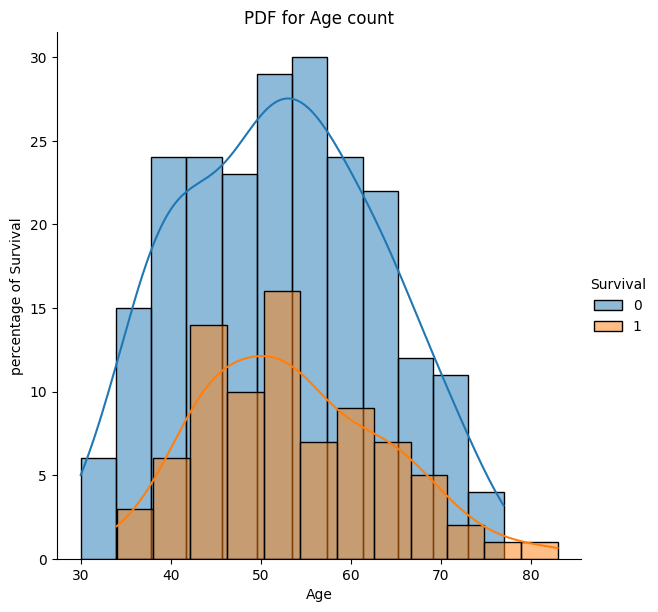

In [94]:
sns.FacetGrid(df, hue='Survival', height= 6).map(sns.histplot, 'Age', bins=12, kde=True).add_legend()  #kde=kernalDensity
plt.xlabel('Age')
plt.ylabel('percentage of Survival')
plt.title('PDF for Age count', size=12)
plt.show()

In [95]:
#Maximum percentage of people living lesser then 5 years are between 43 to 53
#people between age 30 to 33 years are living more then 5 years.
#people with age> 77 will actually live lesser than 5 years

In [96]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)
#grouped b Age and sum of survival

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

1. 6 people who are in the age of 53 will live lesser than 5 years.(from 1)

In [97]:
df.Age.value_counts().sort_values(ascending=False)
# showing Age corresponding to percentage of people
#the age of 83, only 1 percent people survive less than 5 years
#the age of 53, 6/11 percentage of people will live less than 5 years 
# these are the method to see manually fluctuations in the numbers, other wise you can prefer FacetGrid plot to identify pattern shortly

Age
52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

Jiont Plot

In [98]:
#Age-Nodes-Survival

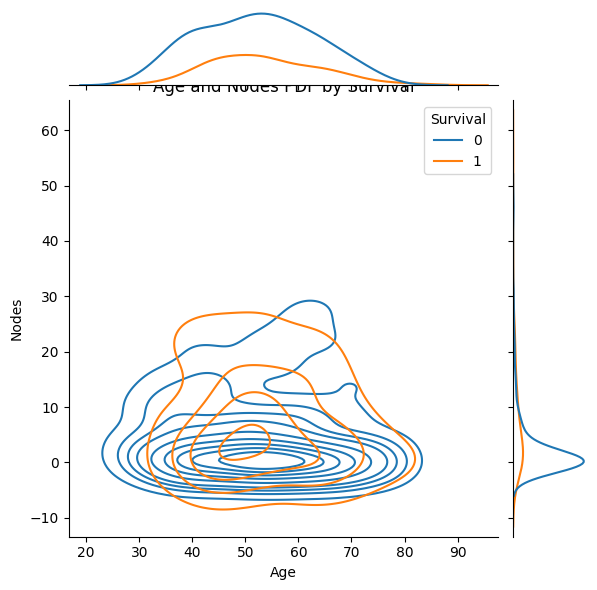

In [99]:
sns.jointplot(x='Age', y='Nodes', data=df, hue='Survival', kind='kde')
plt.title('Age and Nodes PDF by Survival')
plt.show()

📊 What the Plot Represents
This is a 2D KDE plot with marginal KDE plots (distributions on the top and right):

Axes:
X-axis (Age): Age of the patient

Y-axis (Nodes): Number of positive axillary lymph nodes detected (indicator of cancer spread)

Color Hue (Survival):

Blue (0): Survived 5 years or more

Orange (1): Did not survive 5 years

Components:
Contour lines (center plot): Represent high-density regions where Age and Nodes combinations are most common for each survival class.

Top KDE plot: Distribution of Age per survival class.

Right KDE plot: Distribution of Nodes per survival class.

🔍 Graph Interpretation
🔷 Blue Contours (Survived - Class 0):
Dense cluster at Age ~50–65 and Nodes = 0–5

Spread wider in Age, less in Nodes

Indicates survivors often had fewer positive nodes

🟠 Orange Contours (Did NOT Survive - Class 1):
Peak density is lower, more spread out

Higher density at Nodes > 5 and Age 45–60

Suggests that higher node count is more common among non-survivors

🧠 Key Observations:
Nodes is a stronger survival indicator than Age:

Both groups span similar age ranges.

But survivors are concentrated around 0–5 Nodes.

Non-survivors have higher and more variable Node counts.

Age alone isn't very discriminative:

Both survival groups overlap heavily in terms of age.

Age KDE curves on the top are similar, though non-survivors peak slightly earlier.

Multivariate Importance:

This plot shows why it's crucial to look at combinations of variables (here: Age + Nodes).

The separation between classes improves when you consider both variables together.

✅ Conclusion
This KDE jointplot reveals:

Survivors (blue) tend to have fewer lymph nodes affected (Nodes close to 0), regardless of age.

Non-survivors (orange) are more likely to have higher node counts and slightly younger ages.

Nodes is a more powerful feature than Age when it comes to predicting survival in the Haberman dataset.




what is kde mean and what does hue='Survival' mean in the code


📈 What is KDE?
KDE stands for Kernel Density Estimation.

It’s a smooth estimate of the probability distribution of a dataset. In simple terms, KDE is used to:

Visualize the distribution of a variable (like a histogram, but smoother).

Show where data points are more concentrated.

📌 Example:
If you have ages of patients:

A histogram shows bars (bins) for ranges of ages.

A KDE curve shows a smooth line over those values, making it easier to see the shape of the distribution (like "is it bell-shaped?", skewed, etc.).

🧬 What does hue='Survival' mean?
In seaborn plots, **hue** is used to differentiate groups using colors.

In your code:

sns.jointplot(x='Age', y='Nodes', data=df, hue='Survival', kind='kde')
hue='Survival' tells Seaborn:

Group the data by Survival column values.

Use different colors to represent different values of Survival.

In Your Case:
Survival = 0 (Survived 5 years or more) → Blue

Survival = 1 (Did not survive 5 years) → Orange

This helps you visually compare how Age and Nodes are distributed for each survival group in the same plot.

✅ Summary

Term	Meaning
-KDE	: Smooth curve showing the distribution of data
-hue='Survival'	; Color-separates the plot based on survival status

In [100]:
#AGE[43, 53] and NODES[] will live lesser than 5 years

<Axes: xlabel='Survival', ylabel='Nodes'>

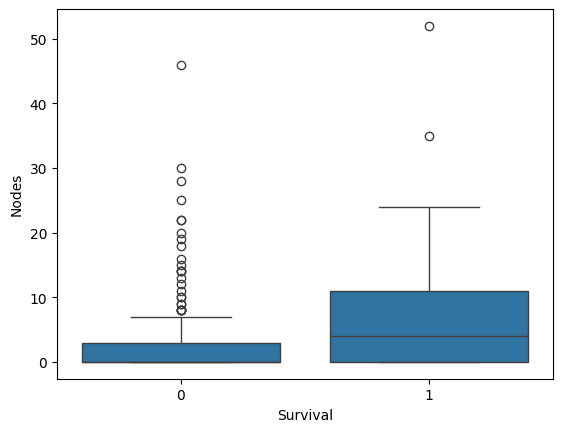

In [101]:
sns.boxplot(x='Survival', y= 'Nodes', data=df)

In [102]:
#in this grapgh we can see outlier and whether it should be treated or not, for this need domain expert, but as per data it should
#not be treated

AttributeError: module 'seaborn' has no attribute 'hisplot'

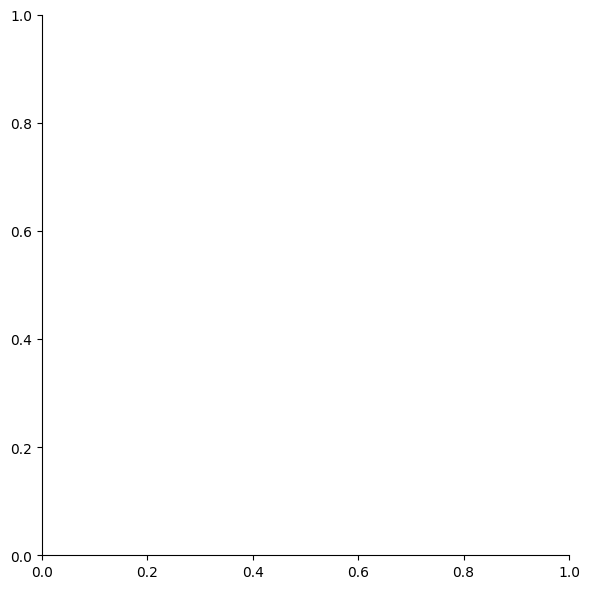

In [103]:
sns.FacetGrid(df, hue='Survival', height= 6).map(sns.hisplot, 'Nodes', bins= 5).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Nodes Count', size= 15)
plt.show()

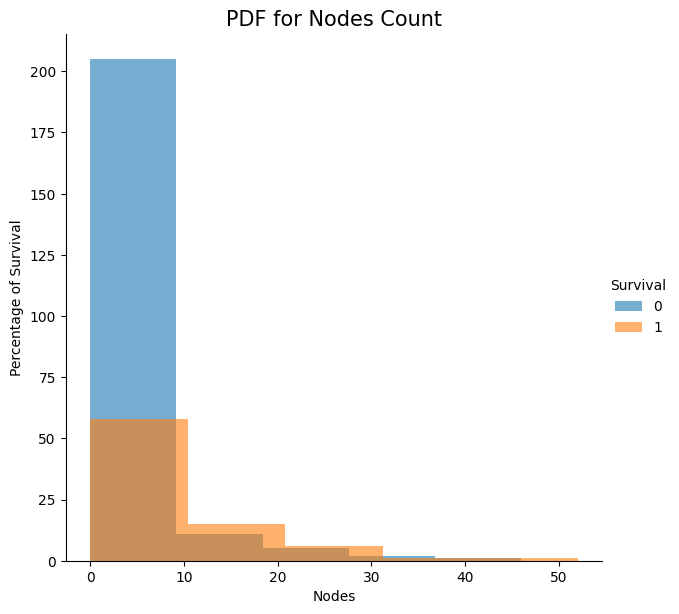

In [104]:
sns.FacetGrid(df, hue='Survival', height=6) \
   .map(plt.hist, 'Nodes', bins=5, alpha=0.6) \
   .add_legend()

plt.xlabel('Nodes')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Nodes Count', size=15)
plt.show()


In [105]:
#in this grapgh, age 43-53 will live lesser than 5 years

In [106]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

In [107]:
df.Nodes.value_counts().sort_values(ascending=False)

Nodes
0     176
1      20
3      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
22      3
19      3
23      3
15      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: count, dtype: int64

In [108]:
27/176

0.1534090909090909

In [109]:
7/20

0.35

-we can say that people with Nodes 0 (contain around 15%) will die less than 5 years

-Node 1 (contain 25%), that mean 25 % of  chance that he will survive lesser than 5 years.

-Node 3 (35%) means 35% of chance that he will survive lesser than 5 years... and so on

-Node 4 (23%) chance

-Node 5 (67%) chance

-13- 80% chnace

-23- 100% chance


Next Feature- Year Vs Percentage of survival

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

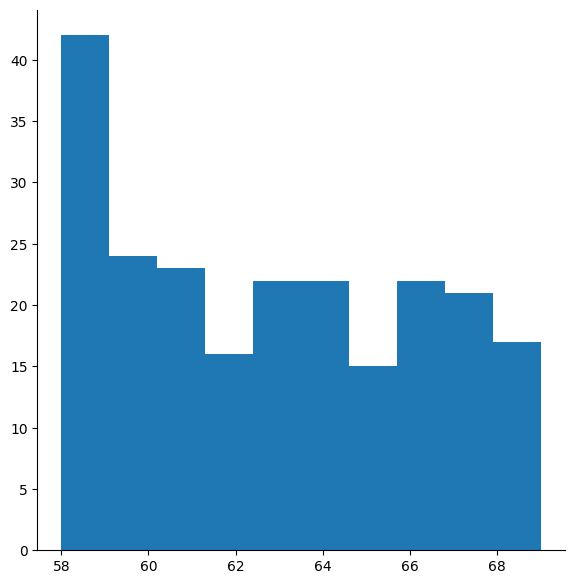

In [110]:
sns.FacetGrid(df, hue= 'Survival', height= 6).map(plt.hist, 'Year', bins=10, kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year count', size= 15)
plt.show()

In [ ]:
sns.displot(data=df, x='Nodes', hue='Survival', kind='hist', bins=10, height=6, kde=True)
plt.xlabel('Year')
plt.ylabel('Percentage of Survival')
plt.title('PDF for Year Count', size=15)
plt.show()


In [ ]:
df.groupby('Survival')['Year'].value_counts().unstack()


Unstack(): In Python's Pandas library, the unstack() function is used to reshape a DataFrame or Series with a multi-level index. It pivots a level of the index labels from rows to columns, effectively "unstacking" the data. This transformation results in a new DataFrame with a different structure.

In [ ]:
13/15

In [111]:
8/22

0.36363636363636365

So Year 1965: around 87  percent of people are dying

-1963- 36% of people are dying 
-1958- 33% of people are dying
-1959- 45% of people are dying

In [112]:
#33% of people died before 5 years when operated between 1965, 66

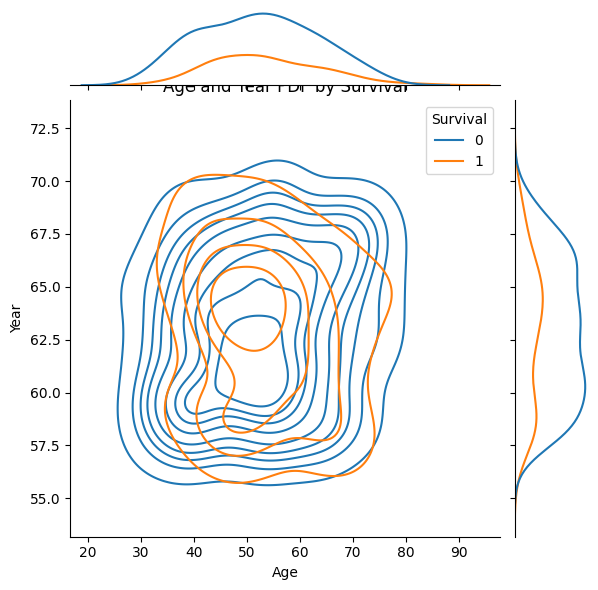

In [113]:
#joint plot
sns.jointplot(x='Age', y='Year', data=df, hue='Survival', kind='kde')
plt.title('Age and Year PDF by Survival')
plt.show()

In [114]:
#this graph is also prooving the same thing what we obtained previously

Haberman: Multivariate Analysis

In the context of the Haberman case study, multivariate analysis in Python helps explore the relationships between multiple variables (age, year of operation, positive lymph nodes, and survival status) to understand how these factors influence patient survival after breast cancer surgery. 

Here's a more detailed explanation:
Understanding the Dataset:
The Haberman dataset, which contains data on breast cancer patients, includes variables like age, year of operation, number of positive axillary lymph nodes, and the patient's survival status (whether they survived for 5 years or more). 

Multivariate Analysis Techniques:
Pair Plots: Pair plots (using libraries like Seaborn) allow for visualizing the relationship between every pair of variables in the dataset, colored by the survival status, which can help identify patterns and correlations. 

Scatter Plots: Scatter plots can be used to examine the relationship between two variables, for example, age vs. positive lymph nodes, and how these relationships differ based on survival status. 

Other Techniques: Other multivariate techniques like correlation analysis, clustering, and regression analysis can be used to further explore the data and identify key factors influencing survival. 

Key Insights:
Identifying Correlations: Multivariate analysis can help identify if there are correlations between variables, for example, if older patients or those with more positive lymph nodes have a lower chance of survival. 

Predictive Modeling: The insights gained from multivariate analysis can be used to build predictive models that can help predict patient survival based on their characteristics. 

Python Libraries:
Libraries like Pandas, Seaborn, Matplotlib, and Scikit-learn are commonly used for performing multivariate analysis in Python on datasets like the Haberman dataset. 

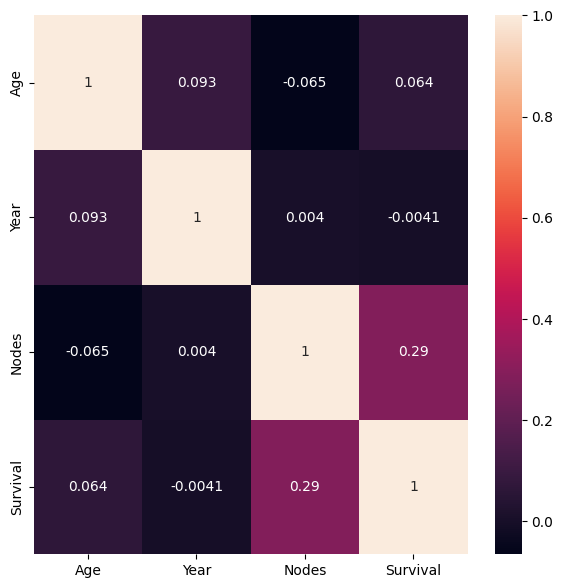

In [115]:
#pivot table #heatmap
plt.figure(figsize=(7, 7))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot= True);

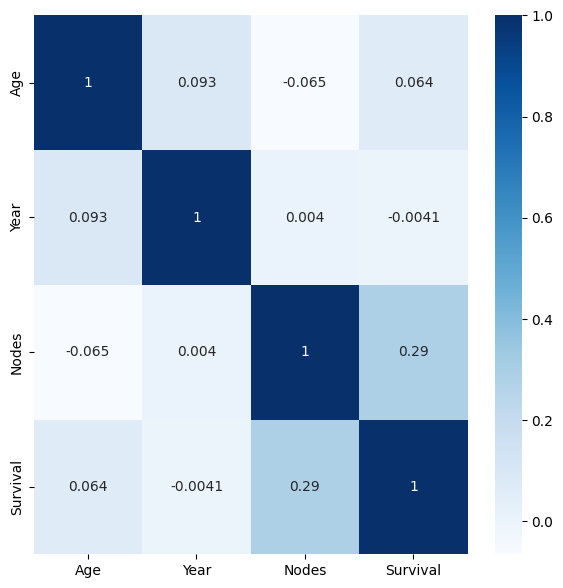

In [116]:
#change color
#pivot table #heatmap
plt.figure(figsize=(7, 7))
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', annot= True);  #cmap= color map

🔥 What is a Correlation Heatmap?
A correlation matrix shows the relationship between multiple variables. Each cell shows a correlation coefficient (ranging from -1 to 1):

1.0 → Perfect positive correlation (as one increases, the other increases)

0.0 → No correlation

-1.0 → Perfect negative correlation (as one increases, the other decreases)


📊 Graph Interpretation (Haberman Dataset)
In this dataset, we have four variables:

Age

Year (Year of operation)

Nodes (number of positive axillary lymph nodes)

Survival (target variable: 1 = died within 5 years, 0 = survived more than 5 years)

Correlation Matrix from the Heatmap:

           Age	   Year	   Nodes	Survival
           
Age	      1.00	  0.093	  -0.065	0.064

Year	  0.093	  1.00	  0.004	   -0.0041

Nodes	 -0.065	  0.004	  1.00	    0.29

Survival  0.064	 -0.0041  0.29	    1.00

🔍 Key Insights:
Nodes vs Survival (0.29):
The number of positive lymph nodes has the strongest correlation with survival (though still a weak/moderate correlation). More nodes typically indicate worse survival chances.

Age and Year have very weak or no correlation with survival:

Age and Survival = 0.064 → almost no correlation

Year and Survival = -0.0041 → completely uncorrelated


🎯 Conclusion (Multivariate Analysis Insight):
This multivariate heatmap shows that:

Among all features, "Nodes" is the most informative variable for predicting survival outcomes.

Age and Year are not strongly related to whether a patient survived more than 5 years or not.

The data doesn't have multicollinearity, which is good if you're planning to use this for machine learning models.

Let me know if you’d like a visual bar plot of top correlated features or want to interpret this for feature selection in ML!

💡 What is correlation?

Correlation tells us how strongly two variables are related to each other.

The result is a number between -1 and 1, called the correlation coefficient.

Correlation Value	   Meaning

+1	                   Perfect positive correlation

0.5 to 1	           Strong positive correlation

0.3 to 0.5	           Moderate positive correlation

0.1 to 0.3	           Weak positive correlation

0 to 0.1	           Very weak or no correlation

0	                   No correlation

Negative value	Same rules, but relationship is inverse


📊 Now, let’s apply this to your heatmap:
➤ Nodes and Survival = 0.29
This is close to 0.3, so it's a weak to moderate positive correlation.


It means: as the number of nodes increases, the chance of not surviving (i.e., survival = 1) also increases.

➤ Age and Survival = 0.064
This is very close to 0 → no real correlation.

It means: Age has almost no impact on survival in this dataset.

➤ Year and Survival = -0.0041
Even closer to 0, and it's negative → no correlation.

Year of operation does not affect survival in this case.

🧠 How to remember:
Closer to 1 or -1 → Strong relationship

Closer to 0 → Weak or no relationship

If a correlation is around 0.3 or higher, it may be useful for prediction. If it’s close to 0, it’s probably not useful.

In [ ]:
#Nodes and Survival are corelated by 29%-------Final conclusion by graph